## Создаём облака слов

#### Импортируем библиотеки и создаём переменные для лемматизатора

In [1]:
##Для корректной работы в jpynb перед первым прогоном кода нужно раскоментить 2 импорта ниже 
#import nltk
#nltk.download('stopwords')
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from pymystem3 import Mystem
from string import punctuation

mystem = Mystem()
stop_words = stopwords.words('russian')

#### Вытаскиваем данные из большой таблички, созданной на прошлом шагу

Данные сортируем по маячкам

In [2]:
data = pd.read_csv('grabb_table.csv')
topor = data[data['Group']=='Топор']
ache = data[data['Group']=='Аче']
ryphmes = data[data['Group']=='Рифмы и панчи']
ria = data[data['Group']=='Риа']

Создаем отдельные переменные с чистым текстом, для создания облак слов

In [3]:
toportext = ' '.join(topor['message'])
achetext = ' '.join(ache['message'])
ryphmestext = ' '.join(ryphmes['message'])
riatext = ' '.join(ria['message'])

#### Функция предобработки (лемматизации) текста

In [4]:
def preprocess_text(text):
    tokens = mystem.lemmatize(text.lower())
    tokens = [token for token in tokens if token not in stop_words \
              and token != " " \
              and token.strip() not in punctuation]

    text = " ".join(tokens)

    return text

#### Подбираем свою палитру цветов для каждого канала и ждём создания облак

В связи с тем, что каждая выборка из каналов содержит более 1млн символов, а процесс лемматизации не быстрый (3.5 +- часа на одно облако)
Я всё прогнал на ночь в pycharm и сохранил все облака, чтобы вам не пришлось ждать

In [ ]:
cloud = WordCloud(background_color='#4f2f2f', colormap='Reds', max_words=80).generate(preprocess_text(toportext))
plt.imshow(cloud)
plt.axis('off')
plt.savefig('Topor_wordcloud.png')

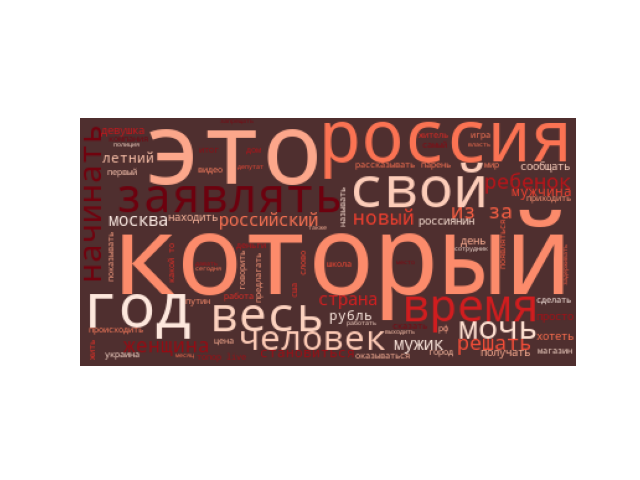


Изучив облако поподробнее можем понять, что новости строятся в основном около темы России (по таким словам как рубль, россия, российский и путин) и темы семейного характера (т.к. слово ребенок не менее популярно чем слова про путина и рубль)

Достаточно неожиданно, потому что до этого момента, я рассчитывал, что будет больше жестокости, нежели политики и семьи

In [ ]:
cloud = WordCloud(background_color='#d9d9d9', colormap='winter', max_words=80).generate(preprocess_text(riatext))
plt.imshow(cloud)
plt.axis('off')
plt.savefig('Ria_wordcloud.png')

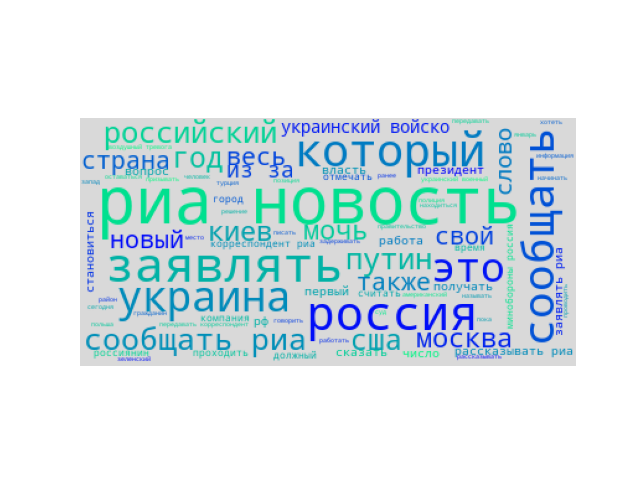

Ну тут всё очень очевидно, и буквально каждое слово завязано на политике и 'спецоперации', в целом большего от гос.канала не ожидалось

(Справедливости ради хочу отметить, что это облако не по всем постам, а по последним 10к из 120к, поэтому это скорее всего связанно с нынешней обстановкой в стране)

In [ ]:
cloud = WordCloud(background_color='#6d647d', colormap='Pastel1', max_words=80).generate(preprocess_text(ryphmestext))
plt.imshow(cloud)
plt.axis('off')
plt.savefig('Ryphmes_wordcloud.png')

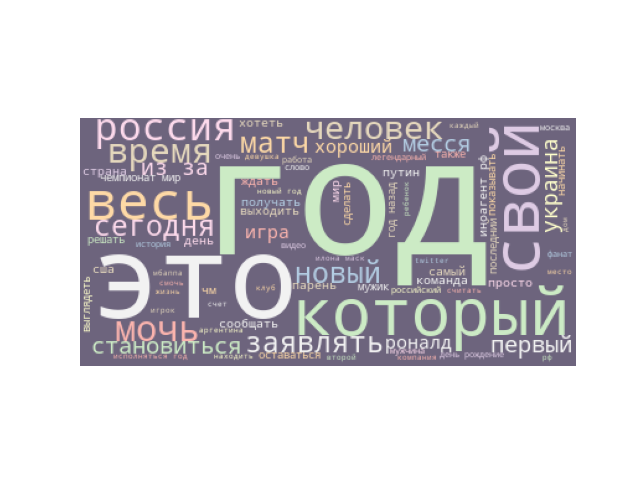

Самое позитивное новостное облачко из всех, политика далеко не в доминантных словах, всё больше завязанно на людях, причём хороших)
(если верить не маленькому слову 'Хороший')

Но всё же на удивление, хоть и канал позиционирует себя как новостной канал в музыке, большинство видных слов связанны с футболом и спортом (матч, игра, команда, первый, 'месся' - месси, также и с 'роналд')

In [ ]:
cloud = WordCloud(background_color='#ffffff', colormap='twilight', max_words=80).generate(preprocess_text(achetext))
plt.imshow(cloud)
plt.axis('off')
plt.savefig('Ache_wordcloud.png')

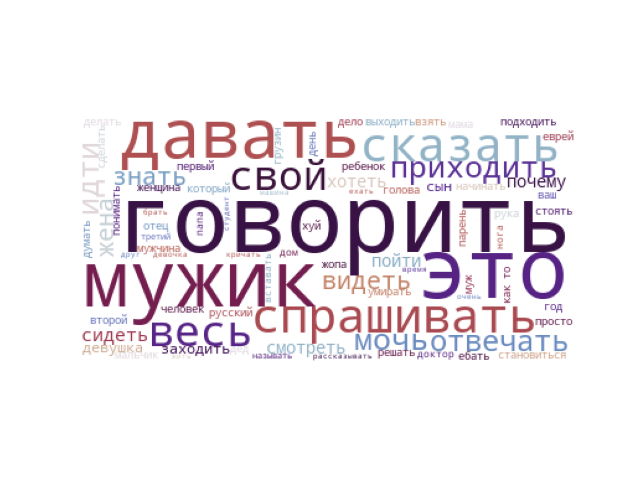

Очень гармоничное облако по которому даже можно составить анекдот, канал с анекдотами точно позиционирует себя как надо, не докопаться

Хоть я и думал, что самые популярные герои анекдотов, это штирлиц, русский, еврей и немец, но на деле из моего списка я угадал только с евреем

В целом очень показательное облако вышло, особенно забавна гармония букв 'О' в слове 'говорить'

**Выводы:** 


1.   Благодаря проекту, мы узнали, чему отдаётся наибольшее предпочтение в разных телеграм СМИ
2.   Также осознали, что наши ожидания от новостных каналов и реальность могут сильно отличаться (особенно сильное различие ожидание/реальность в канале 'Рифмы и Панчи')
3.   Дополнительно выяснили на каких глаголах зачастую построенны современные анекдоты, а также о самых популярных персонажах в них



